### Phase 1 — Data Cleaning & Tabular Feature Engineering

#### Objective
Prepare the raw housing dataset for multimodal modeling by performing data cleaning, feature engineering, and target transformation. This notebook focuses exclusively on **tabular data preprocessing** and establishes a clean, consistent input for downstream modeling stages.

#### Key Steps
- Load and clean raw housing data
- Handle missing values and outliers
- Engineer domain-specific features (e.g., size-quality interactions, neighborhood density ratios)
- Transform target variable (log-price)
- Save cleaned datasets for reuse

#### Output
- Cleaned and feature-engineered tabular dataset used across all subsequent phases

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [73]:
train = pd.read_csv("../data/raw/train(1).csv")
test = pd.read_csv("../data/raw/test2.csv")

In [74]:
train.shape, test.shape

((16209, 21), (5404, 20))

In [75]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [76]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [78]:
train.isna().sum().sort_values(ascending=False)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Text(0.5, 1.0, 'Price Distribution')

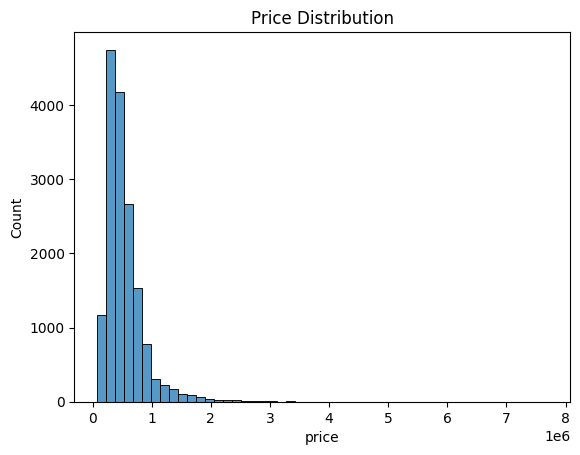

In [79]:
sns.histplot(train['price'], bins=50)
plt.title("Price Distribution")

<Axes: xlabel='log_price', ylabel='Count'>

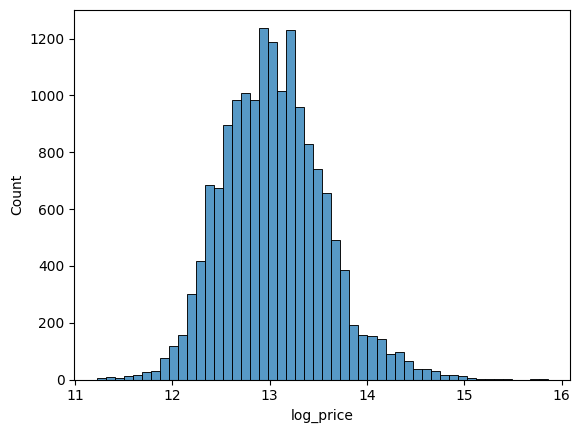

In [80]:
train['log_price'] = np.log1p(train['price'])
sns.histplot(train['log_price'], bins=50)

Text(0.5, 1.0, 'Correlation of Features with Log Price')

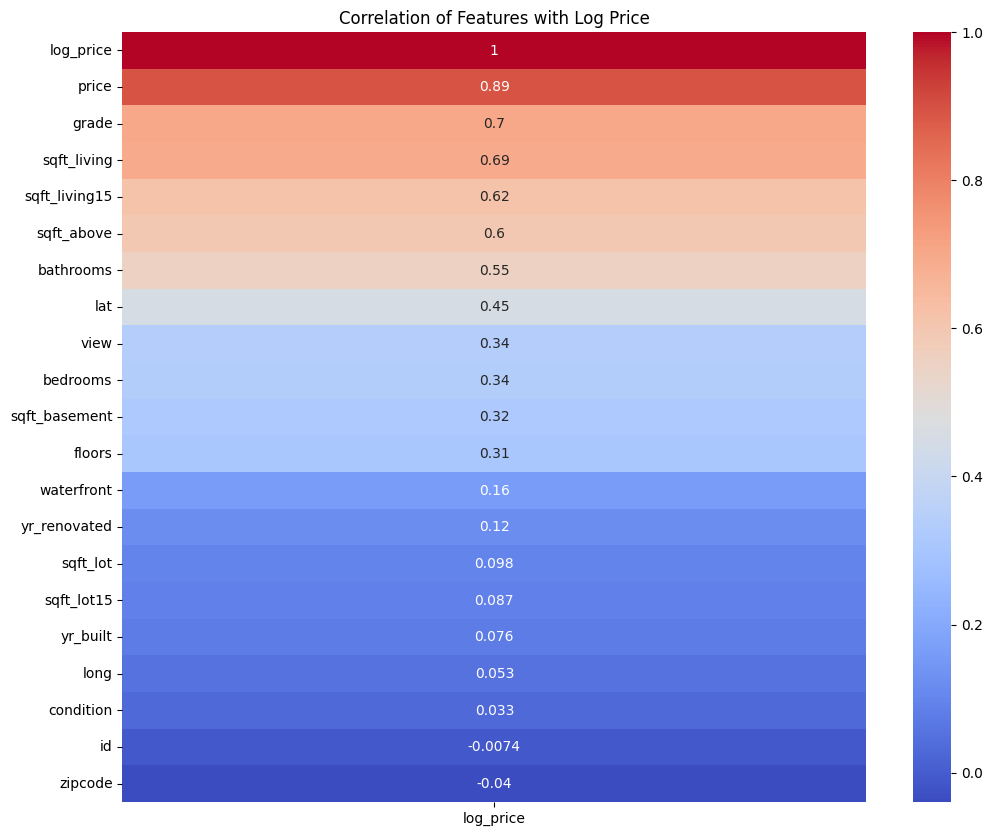

In [81]:
corr = train.select_dtypes('number').corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr[['log_price']].sort_values(by='log_price', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation of Features with Log Price")

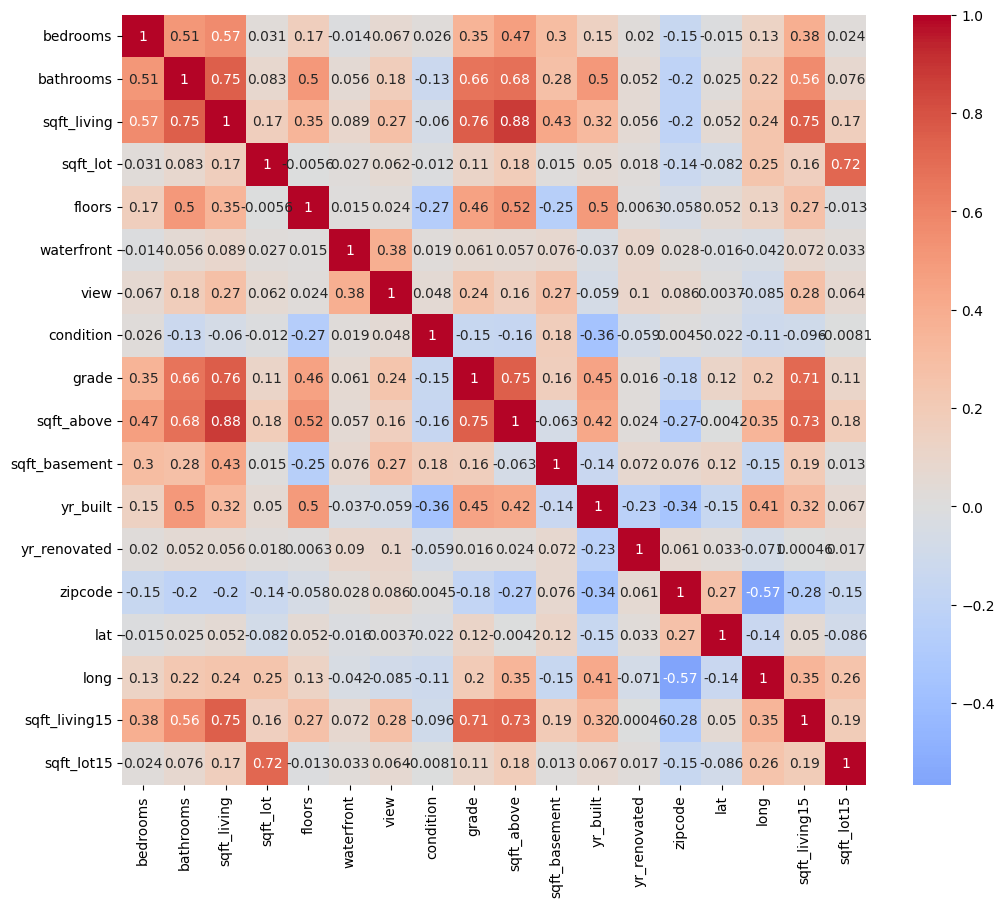

In [82]:
plt.figure(figsize=(12,10))
sns.heatmap(
    train.drop(columns=['id', 'date', 'price', 'log_price']).corr(),
    cmap='coolwarm',
    annot=True,
    center=0
)
plt.show()

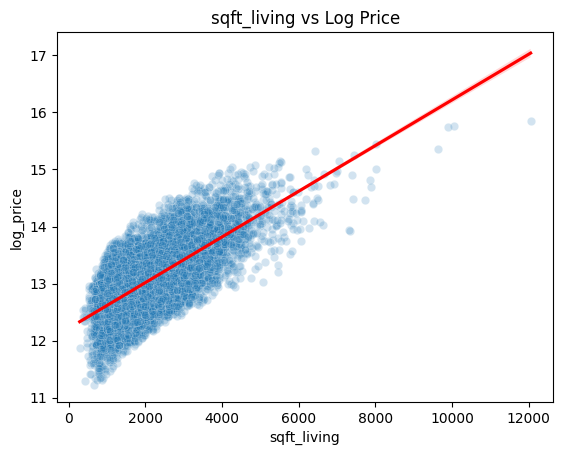

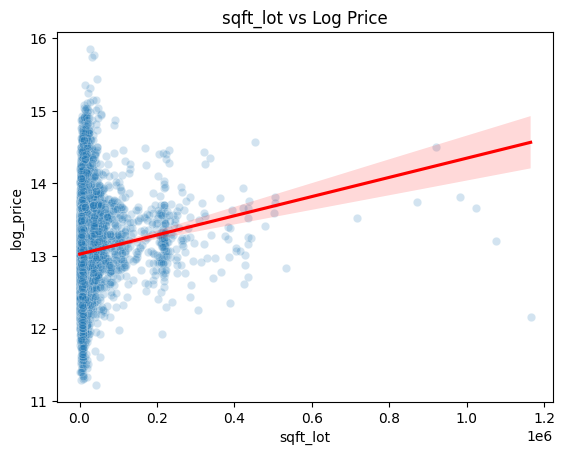

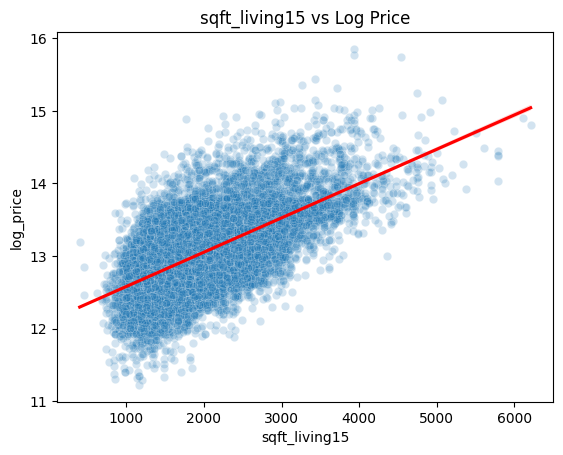

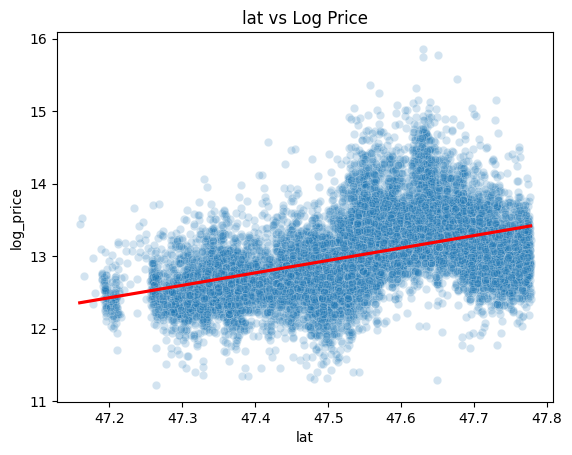

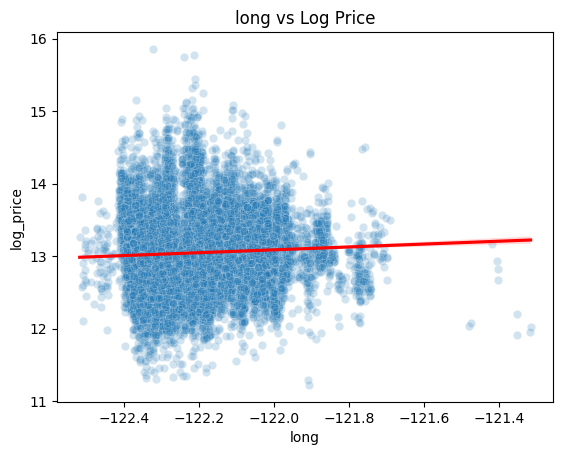

In [83]:
features = ['sqft_living', 'sqft_lot', 'sqft_living15', 'lat', 'long']

for f in features:
    sns.scatterplot(x=train[f], y=train['log_price'], alpha=0.2)
    sns.regplot(x=train[f], y=train['log_price'], scatter=False, color='red')
    plt.title(f"{f} vs Log Price")
    plt.show()

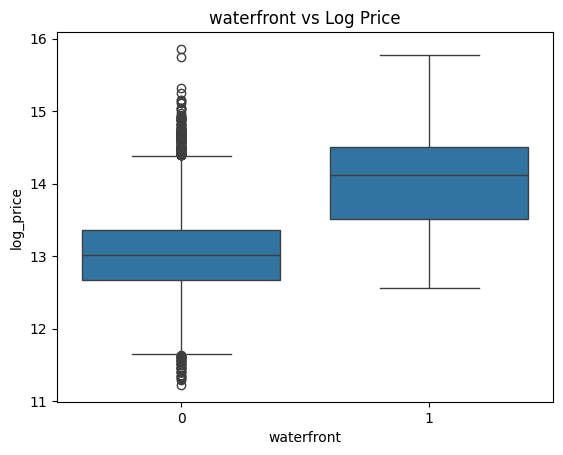

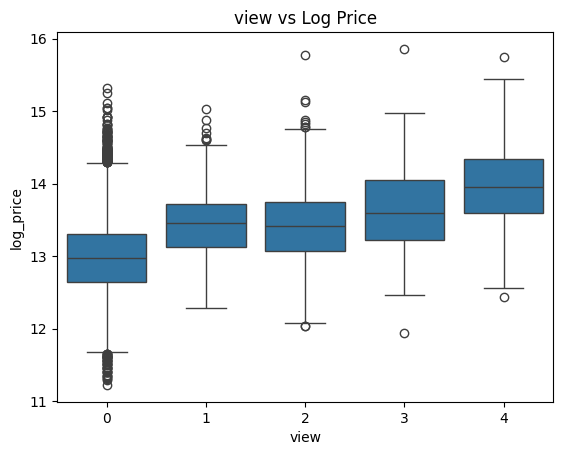

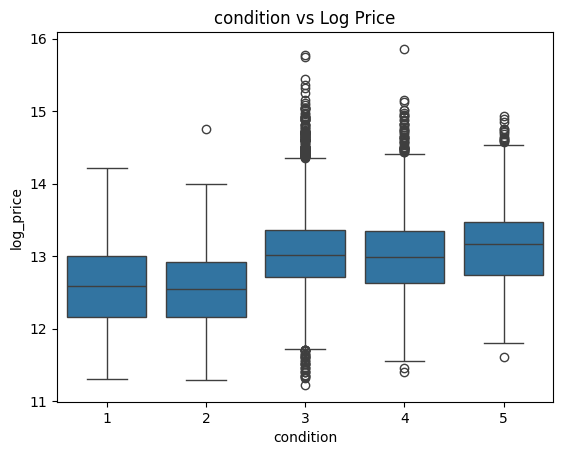

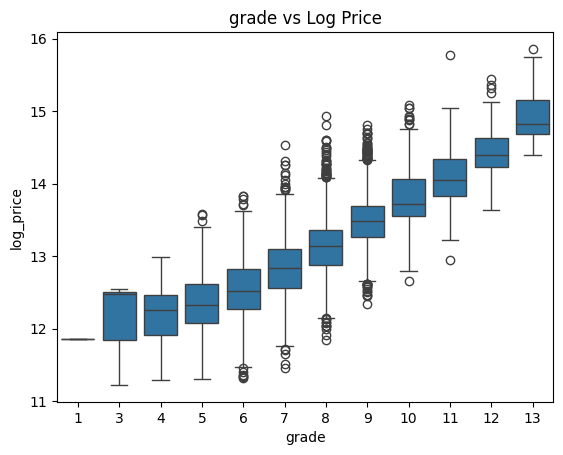

In [84]:
cat_features = ['waterfront', 'view', 'condition', 'grade']

for f in cat_features:
    sns.boxplot(x=train[f], y=train['log_price'])
    plt.title(f"{f} vs Log Price")
    plt.show()

In [85]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,12.501142
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,12.409018
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,12.206078
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,1150,90,2009,0,98027,47.5321,-122.073,1240,750,12.772806
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,12.354497


In [ ]:
drop_cols = ['price', 'date', 'sqft_above', 'sqft_basement', 'zipcode', 'yr_built', 'yr_renovated']
train_new = train.drop(columns=drop_cols)
test_new  = test.drop(columns=drop_cols)

In [ ]:
train_new.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [88]:
train_new['size_quality'] = train_new['sqft_living']*train_new['grade']
train_new['living_density_ratio'] = train_new['sqft_living']/(train_new['sqft_living15'] + 1)

In [89]:
test_new['size_quality'] = test_new['sqft_living']*test_new['grade']
test_new['living_density_ratio'] = test_new['sqft_living']/(test_new['sqft_living15'] + 1)

In [ ]:
TABULAR_FEATURES = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'size_quality', 'living_density_ratio']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_new[TABULAR_FEATURES])

In [ ]:
X = pd.DataFrame(X_scaled, columns=TABULAR_FEATURES, index=train_new.index)
y = train_new['log_price']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_val)

rmse_lr = root_mean_squared_error(y_val, preds)
r2_lr = r2_score(y_val, preds)

rmse_lr, r2_lr

(0.2614581841083552, 0.7522758918192823)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

preds = rf.predict(X_val)

rmse_rf = root_mean_squared_error(y_val, preds)
r2_rf = r2_score(y_val, preds)

rmse_rf, r2_rf

(0.17968914410307668, 0.8829941778458611)

In [ ]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

preds = xgb.predict(X_val)

rmse_xgb = root_mean_squared_error(y_val, preds)
r2_xgb = r2_score(y_val, preds)

rmse_xgb, r2_xgb

(0.1668147266239282, 0.8991600623151893)

<Axes: >

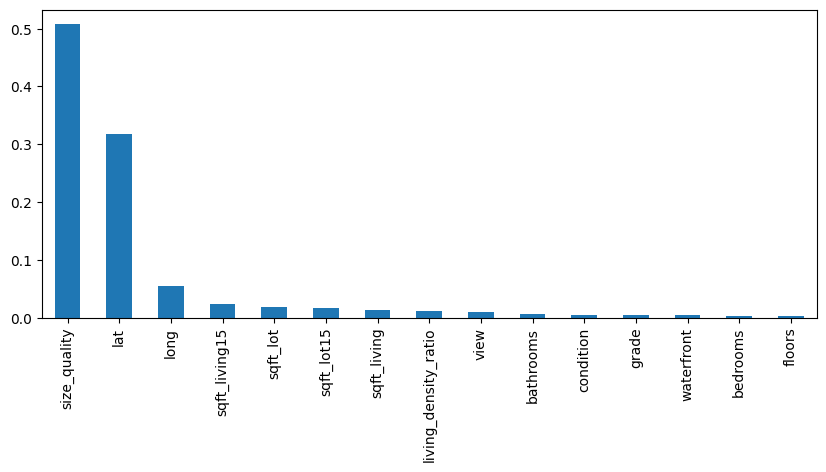

In [ ]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.plot(kind='bar', figsize=(10,4))

In [90]:
train_new.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,sqft_living15,sqft_lot15,log_price,size_quality,living_density_ratio
0,9117000170,4,2.25,1810,9240,2.0,0,0,3,7,47.4362,-122.187,1660,9240,12.501142,12670,1.089705
1,6700390210,3,2.50,1600,2788,2.0,0,0,4,7,47.4034,-122.187,1720,3605,12.409018,11200,0.929692
2,7212660540,4,2.50,1720,8638,2.0,0,0,3,8,47.2704,-122.313,1870,7455,12.206078,13760,0.919294
3,8562780200,2,2.25,1240,705,2.0,0,0,3,7,47.5321,-122.073,1240,750,12.772806,8680,0.999194
4,7760400350,3,2.00,1280,13356,1.0,0,0,3,7,47.3715,-122.074,1590,8071,12.354497,8960,0.804525


In [91]:
train_new.to_csv("../data/processed/train_clean.csv", index=False)
test_new.to_csv("../data/processed/test_clean.csv", index=False)